In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib as mpl
from projet_6_bis_iteration_friendly import *
from components.computation.compute_nusselt import *
from IPython.display import clear_output
from joblib import dump, load
import json

In [23]:

# --- Paramètres du domaine et numérique ---
nx, ny = 31, 31
Lx, Ly = 1.0, 1.0
dt = 1e-3  # à ajuster si ça diverge à grand Re/Ra

dx = Lx/(nx-1)
dy = Ly/(ny-1)

# --- Grilles de paramètres ---
nu = 1.57e-5
Re_list = [100]              # -> plusieurs Re
Ra_list=np.concatenate((np.arange(1,10)*1e4, np.arange(1,11)*1e5))
Pr = 0.71

res_dict = {}

clear_output()
for i, Re in enumerate(Re_list):
    res_dict[Re] = {}
    for j, Ra in enumerate(Ra_list):
        print(f"Re = {Re:.0f}, Ra = {Ra:.2e}")
        U0, res_dict[Re][Ra]= global_resolution(nx, ny, Lx, Ly, dt, nu, Re, Ra)
        res_dict[Re][Ra]['U0'] = U0
        clear_output()

In [61]:
dump(res_dict, 'res_dict_Re=100_Ra=1e4-1e6-x19_nx=ny=31_dt=1e-3.joblib', compress=7)

['res_dict_Re=100_Ra=1e4-1e6-x19_nx=ny=31_dt=1e-3.joblib']

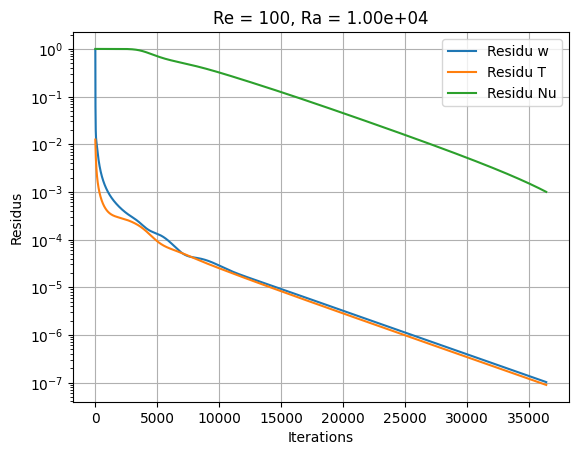

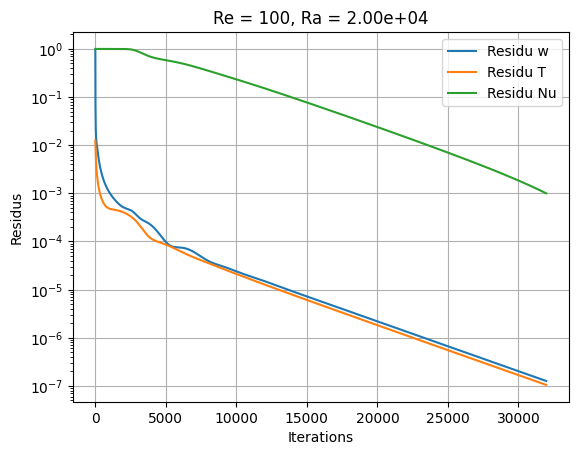

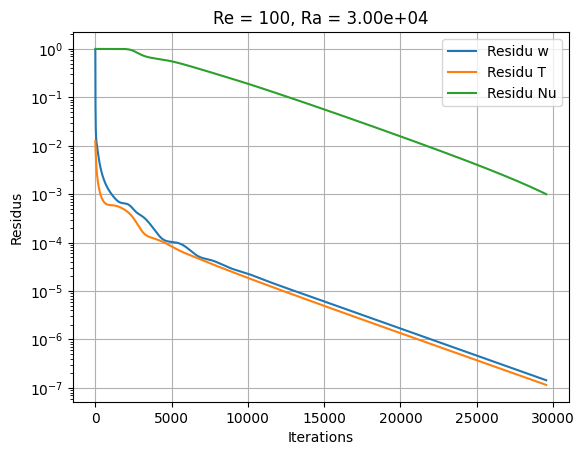

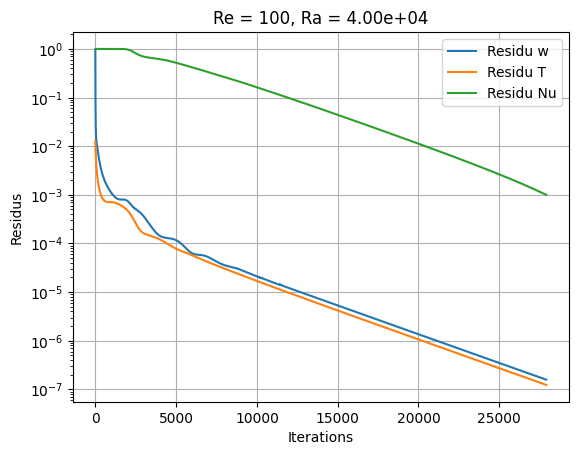

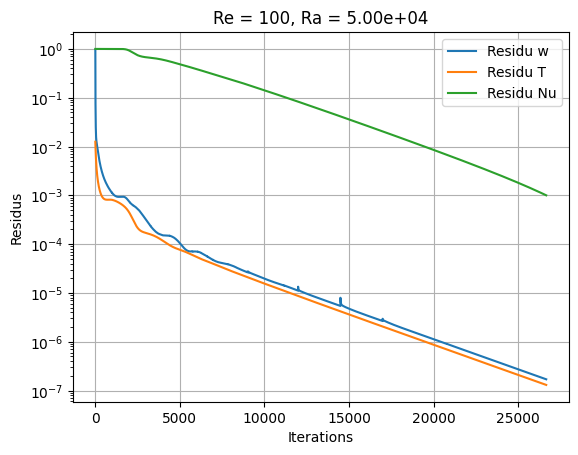

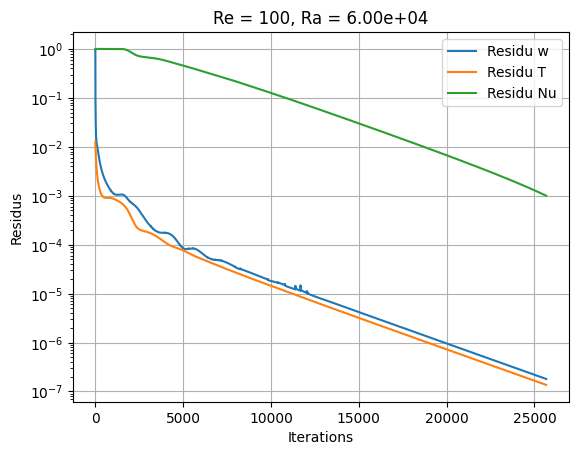

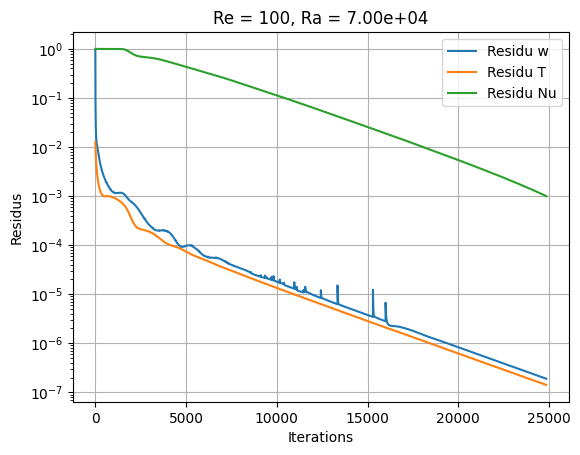

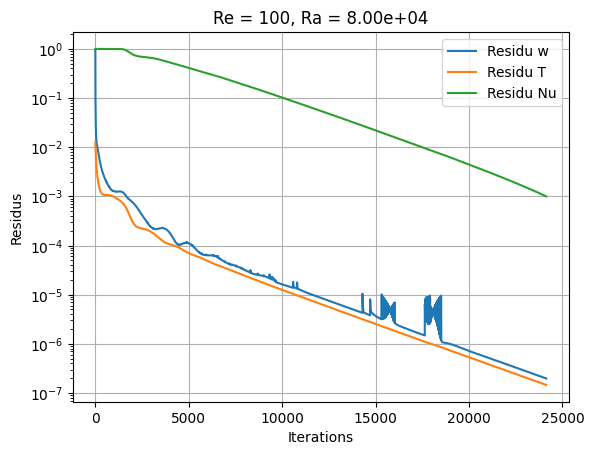

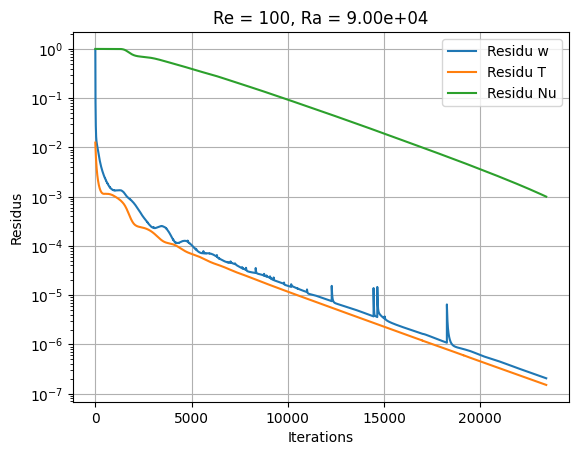

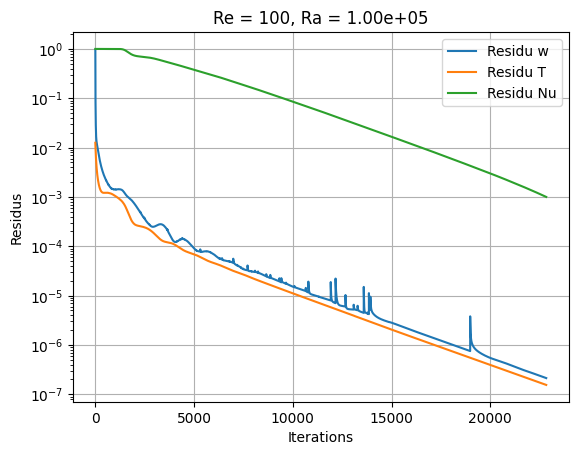

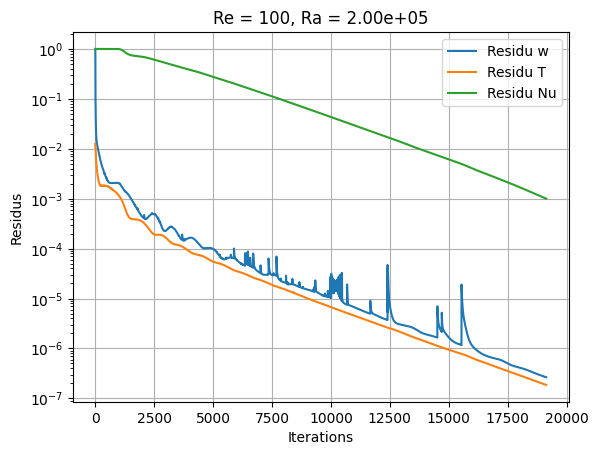

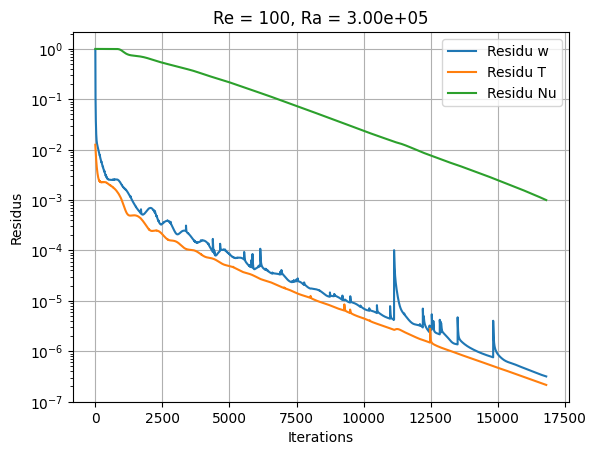

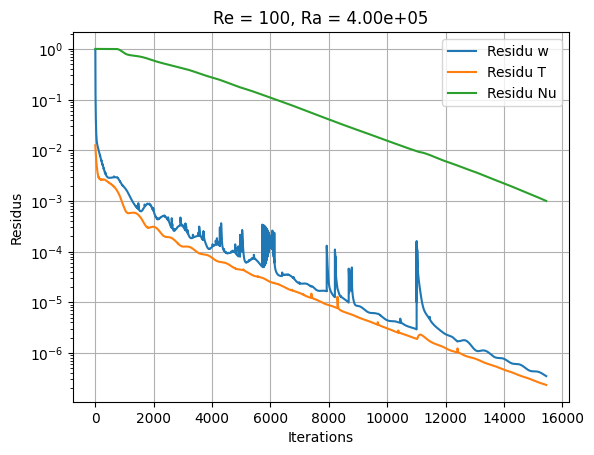

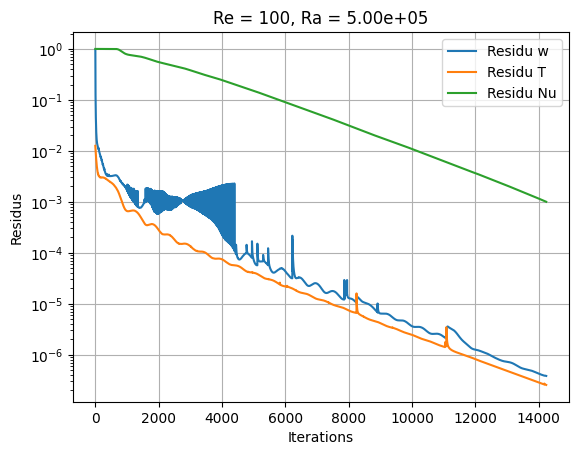

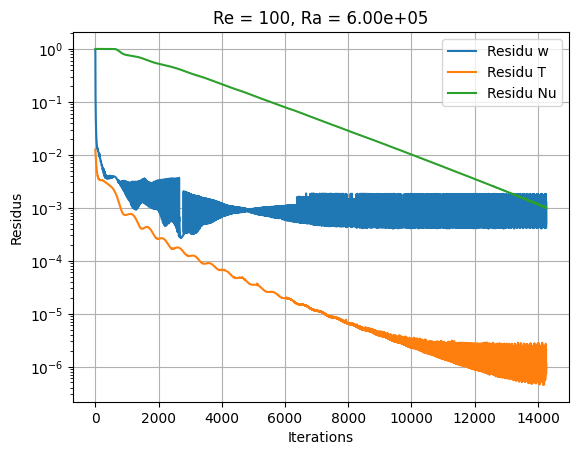

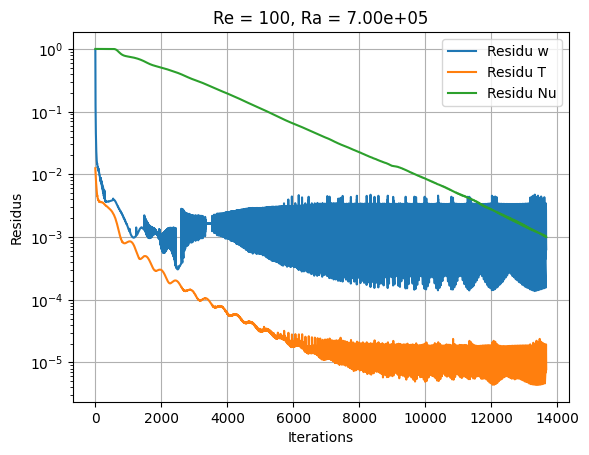

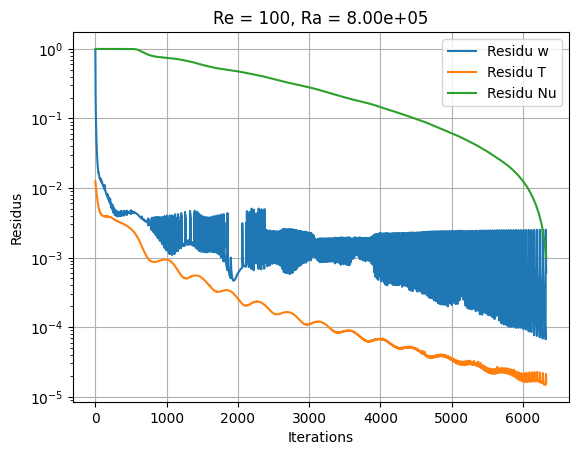

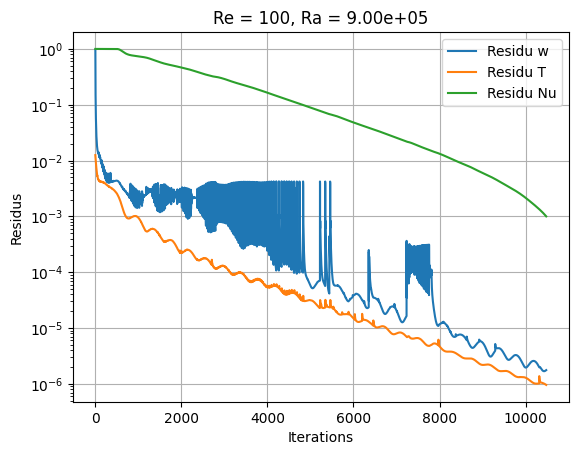

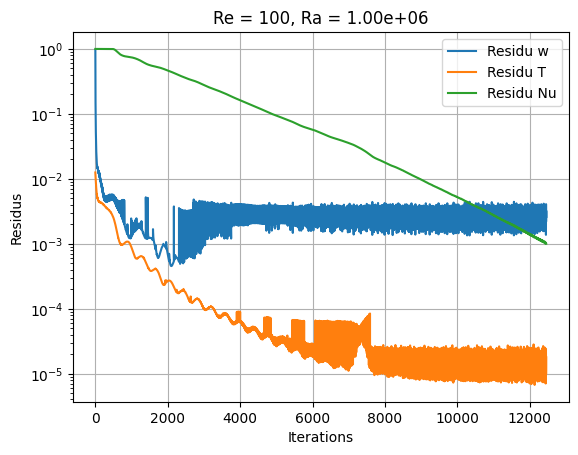

In [ ]:
for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(Ra_list):
        res_w_plot = res_dict[Re][Ra]['res_w']
        res_T_plot = res_dict[Re][Ra]['res_T']
        res_Nu_plot = res_dict[Re][Ra]['res_Nu']
        plt.plot(res_w_plot, label = 'Residu w')
        plt.plot(res_T_plot, label = 'Residu T')
        plt.plot(res_Nu_plot, label = 'Residu Nu')
        plt.legend()
        plt.yscale('log')
        plt.grid()
        plt.xlabel('Iterations')
        plt.ylabel('Residus')
        plt.title(f"Re = {Re:.0f}, Ra = {Ra:.2e}")
        plt.show()

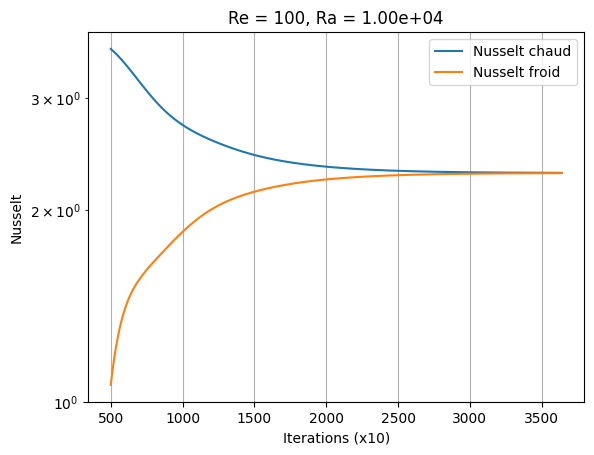

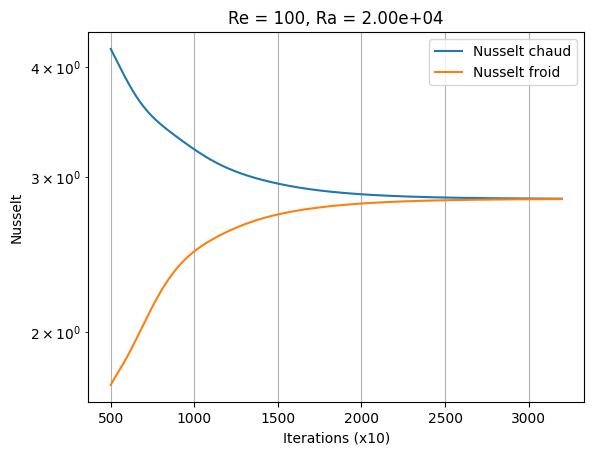

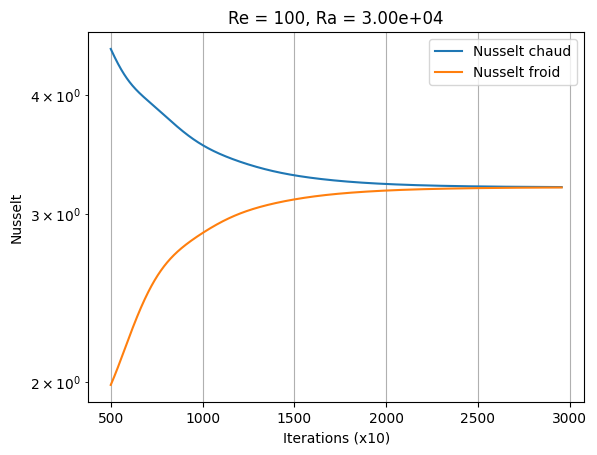

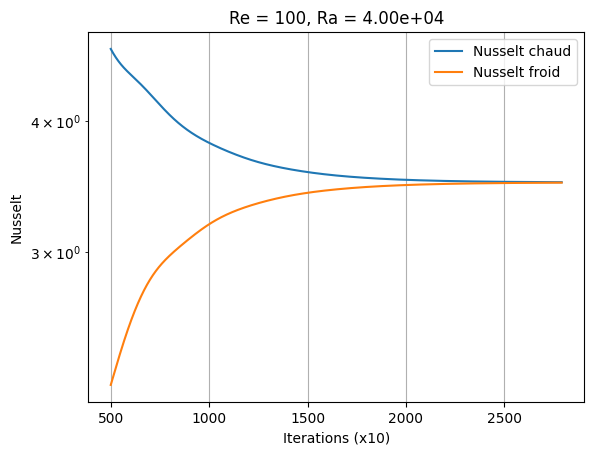

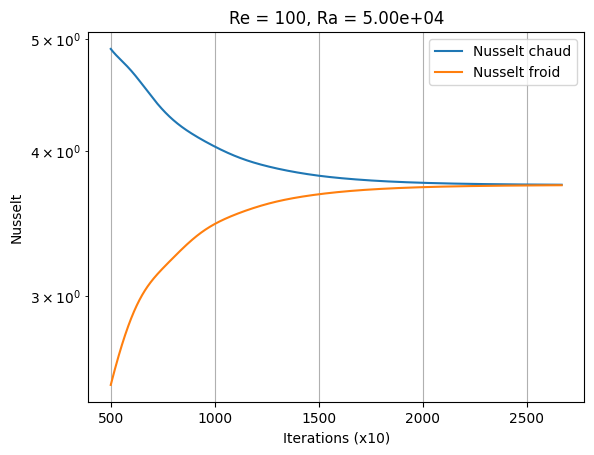

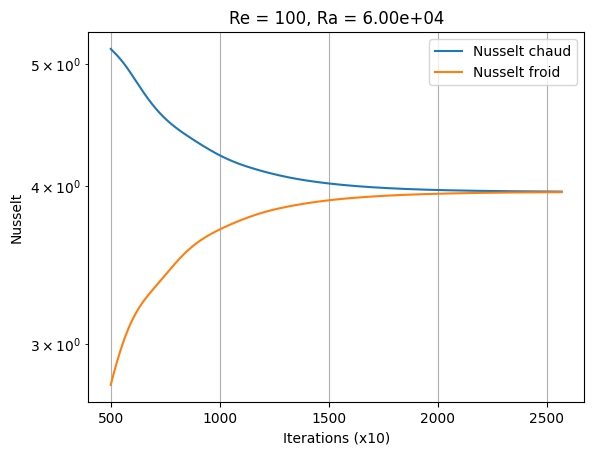

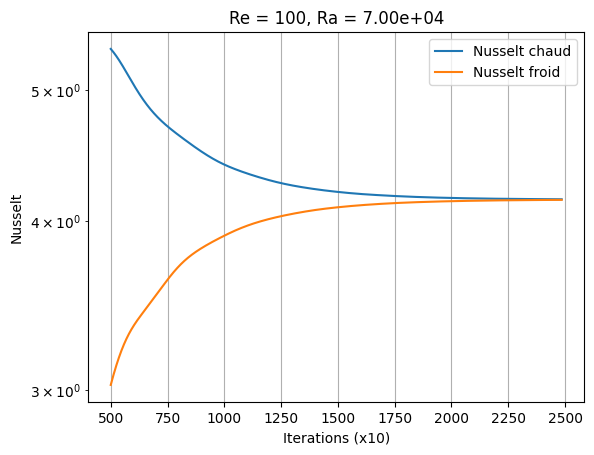

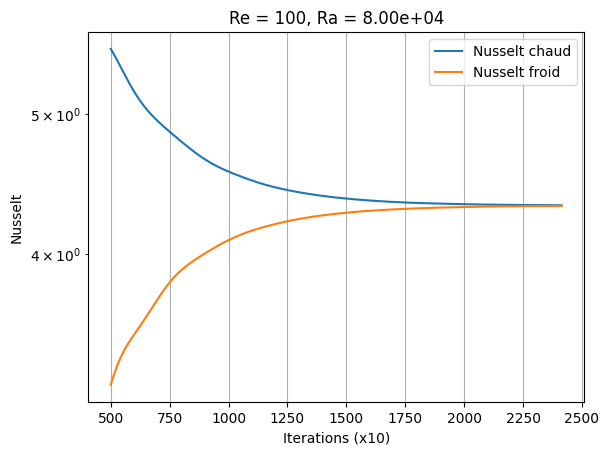

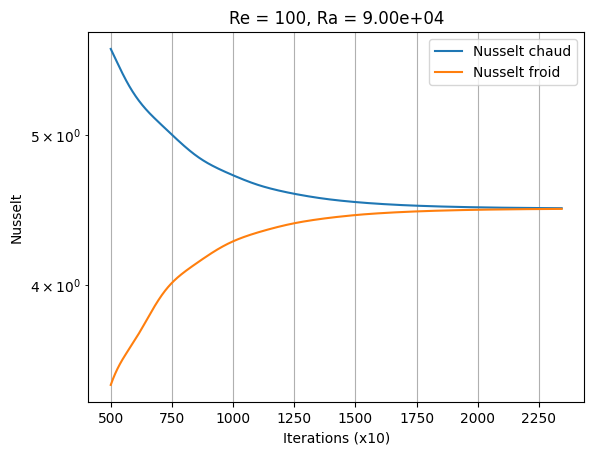

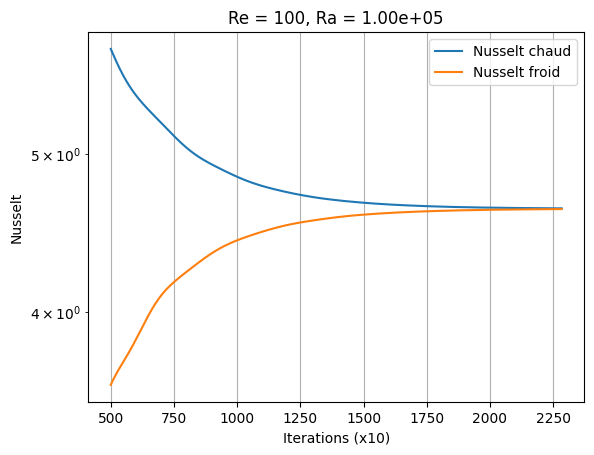

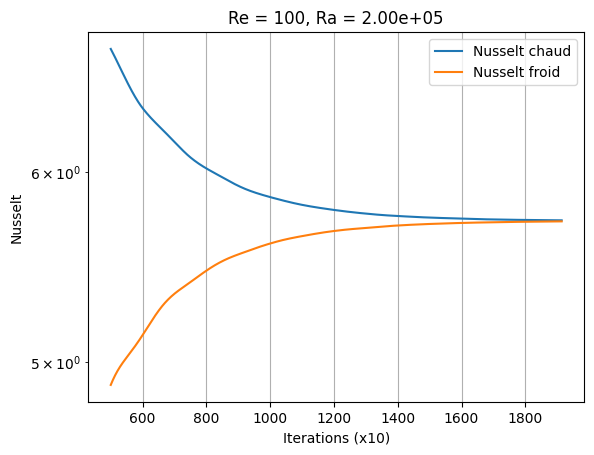

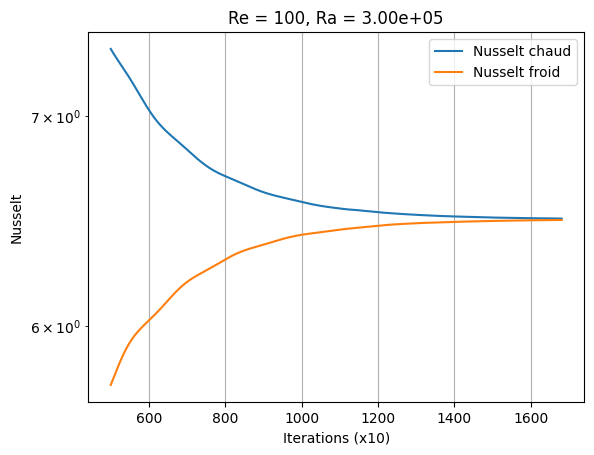

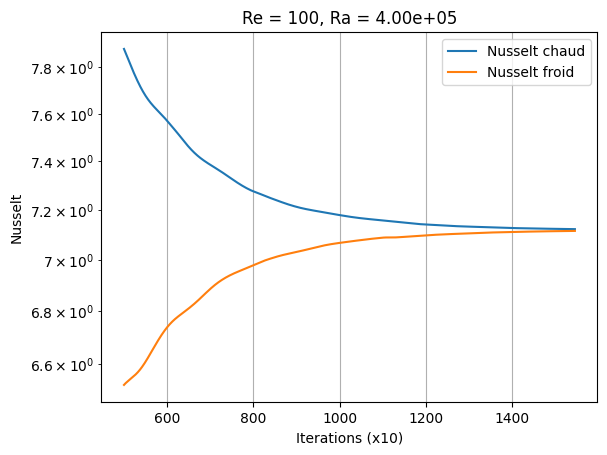

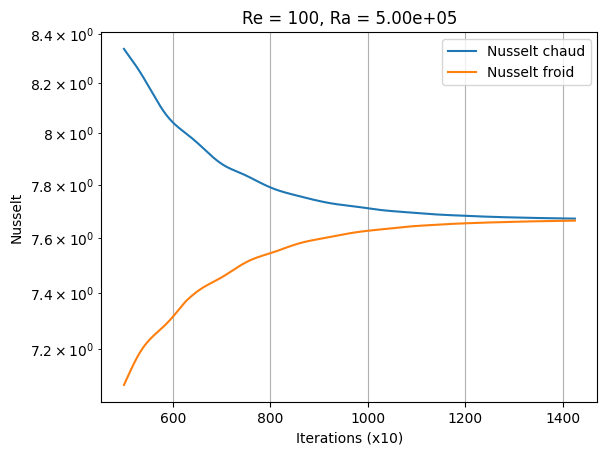

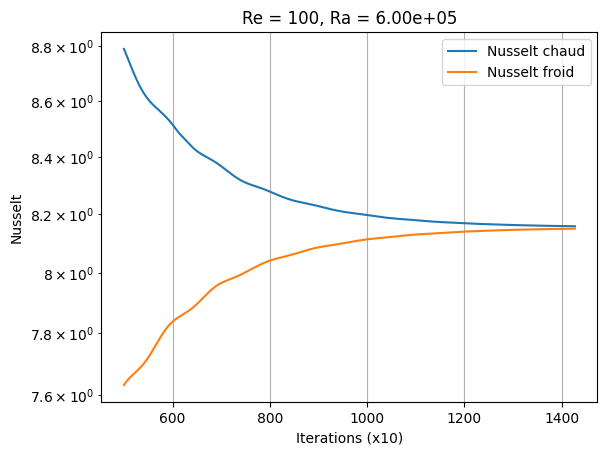

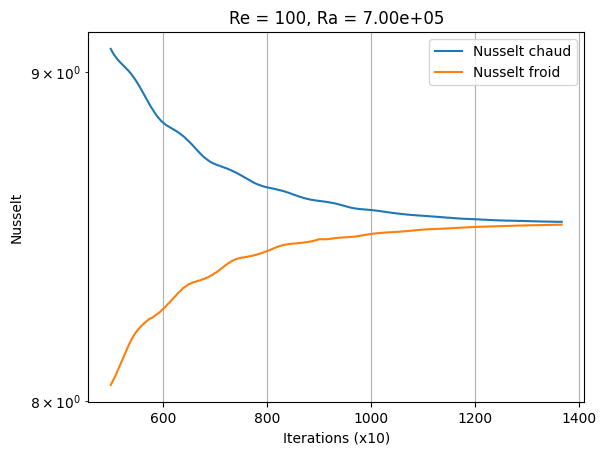

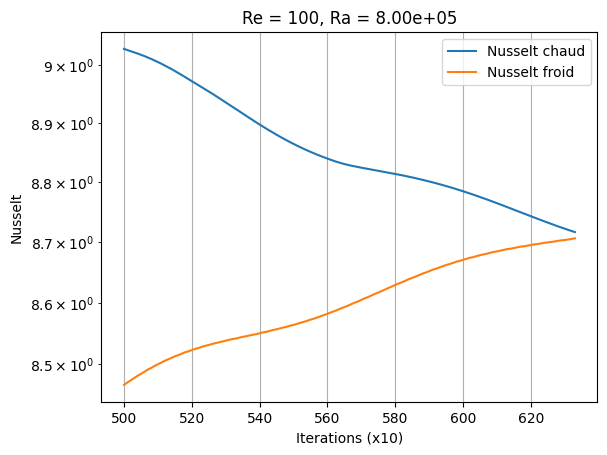

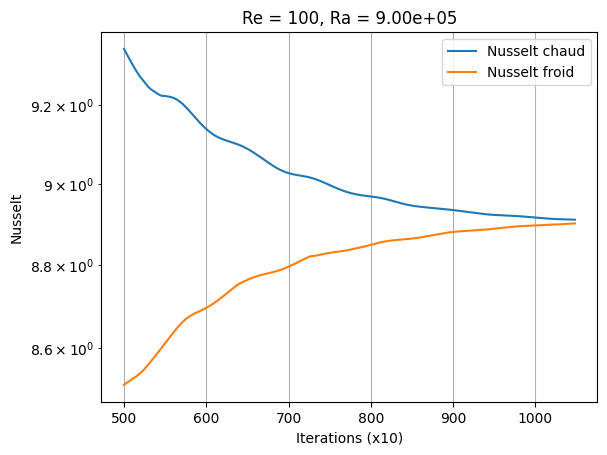

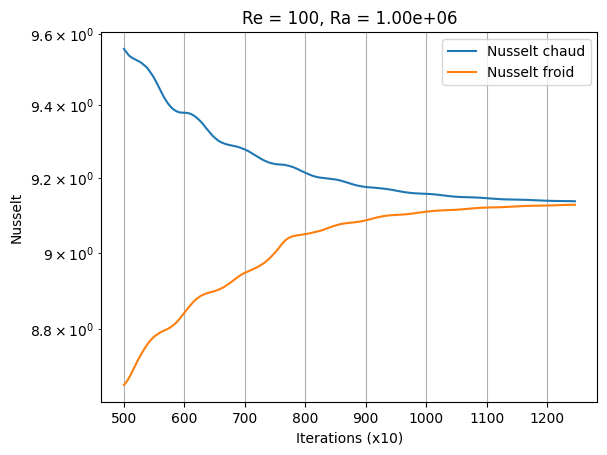

In [49]:
kmin = 500
for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(Ra_list):
        Nu_hot_plot = []
        Nu_cold_plot = []
        for k in range(len(res_dict[Re][Ra]['T'])):
            if k >= kmin:
                Nu_hot_plot.append(get_average_nusselt(res_dict[Re][Ra]['T'][k], dx)[0])
                Nu_cold_plot.append(get_average_nusselt(res_dict[Re][Ra]['T'][k], dx)[1])
        plt.plot(np.arange(len(Nu_hot_plot))+kmin, Nu_hot_plot, label = 'Nusselt chaud')
        plt.plot(np.arange(len(Nu_hot_plot))+kmin, Nu_cold_plot, label = 'Nusselt froid')
        plt.legend()
        plt.grid()
        plt.xlabel('Iterations (x10)')
        plt.ylabel('Nusselt')
        plt.yscale('log')
        plt.title(f"Re = {Re:.0f}, Ra = {Ra:.2e}")
        plt.show()

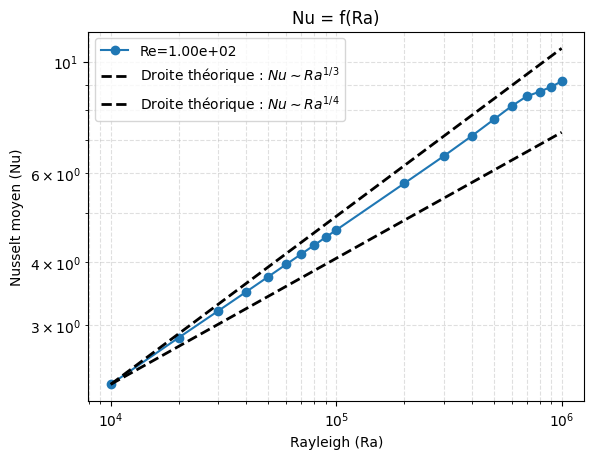

In [48]:
plt.figure()

for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(list(res_dict[Re].keys())):
        res_dict[Re][Ra]['Nu'] = get_average_nusselt(res_dict[Re][Ra]['T'][-1], dx)[0]

# --- Courbes numériques ---
for i, Re in enumerate(Re_list):
    plt.plot(res_dict[Re].keys(), [res_dict[Re][k]['Nu'] for k in res_dict[Re].keys()], marker="o", label=f"Re={Re:.2e}")

# --- Choix du Re de référence (ex: Re = 100) ---
Re_ref = np.min(list(res_dict.keys()))

# --- Droite théorique : pente 1/4 ---
Ra_th = np.array(Ra_list, dtype=float)

Ra0 = Ra_th[0]
Nu0 = res_dict[Re_ref][Ra0]['Nu']

C = Nu0 / (Ra0**(1/3))
Nu_th = C * Ra_th**(1/3)

plt.plot(
    Ra_th,
    Nu_th,
    "k--",
    linewidth=2,
    label=r"Droite théorique : $Nu \sim Ra^{1/3}$"
)

C = Nu0 / (Ra0**(1/4))
Nu_th = C * Ra_th**(1/4)

plt.plot(
    Ra_th,
    Nu_th,
    "k--",
    linewidth=2,
    label=r"Droite théorique : $Nu \sim Ra^{1/4}$"
)

# --- Mise en forme ---
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rayleigh (Ra)")
plt.ylabel("Nusselt moyen (Nu)")
plt.title("Nu = f(Ra)")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.show()


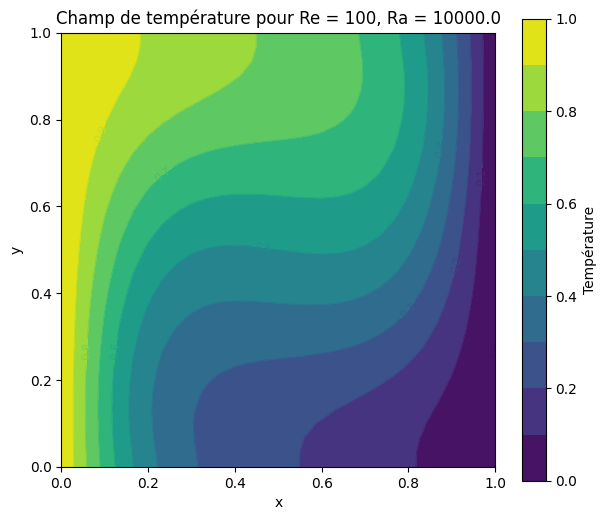

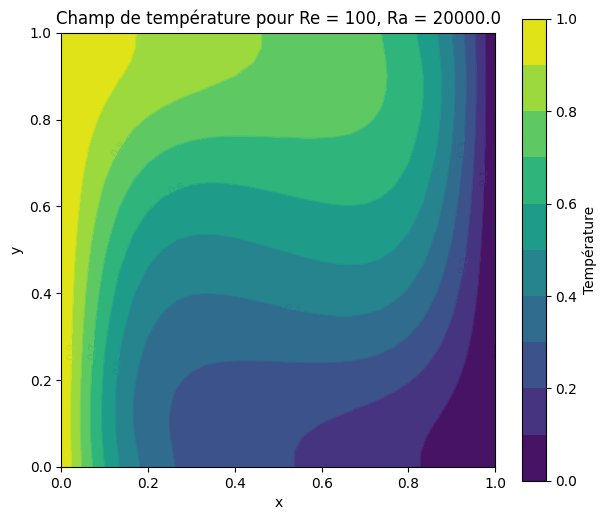

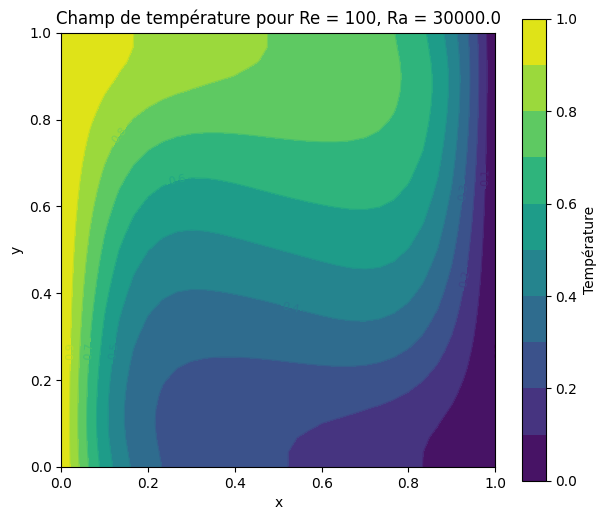

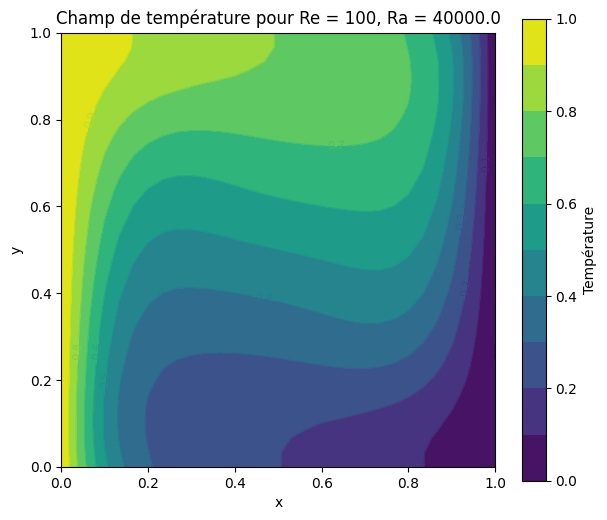

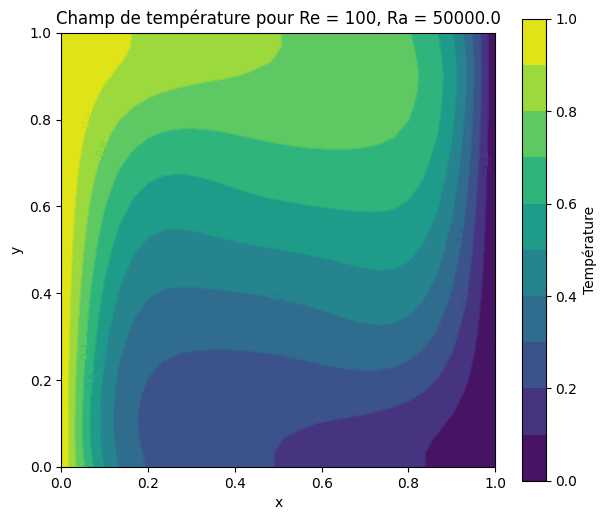

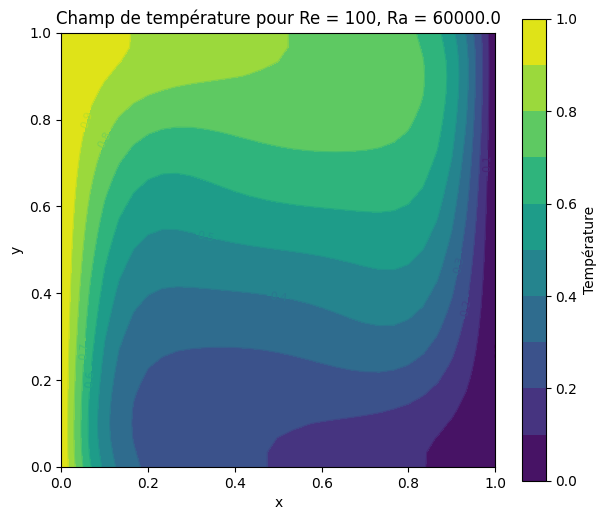

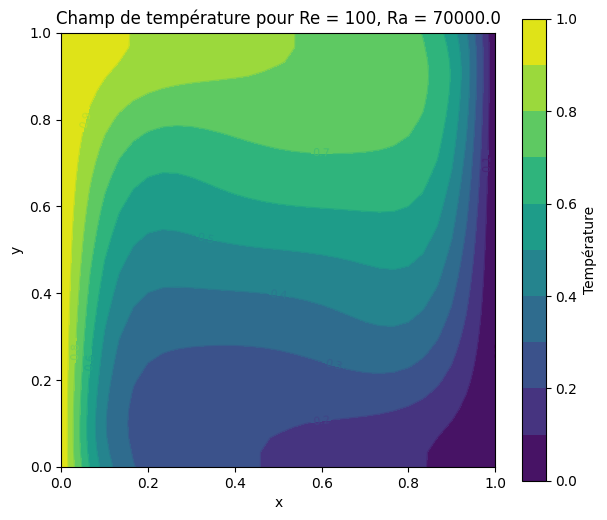

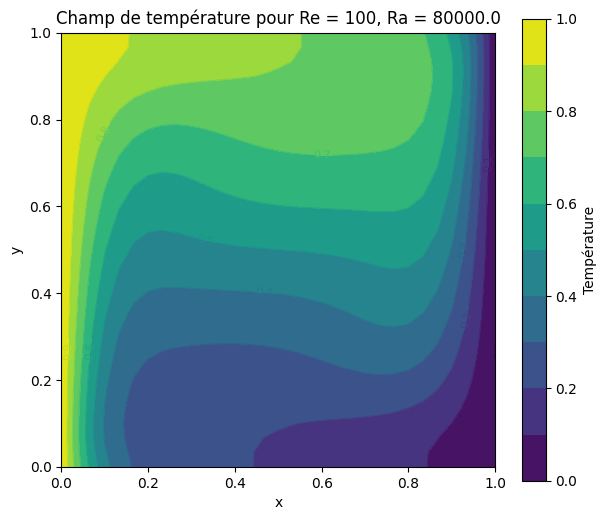

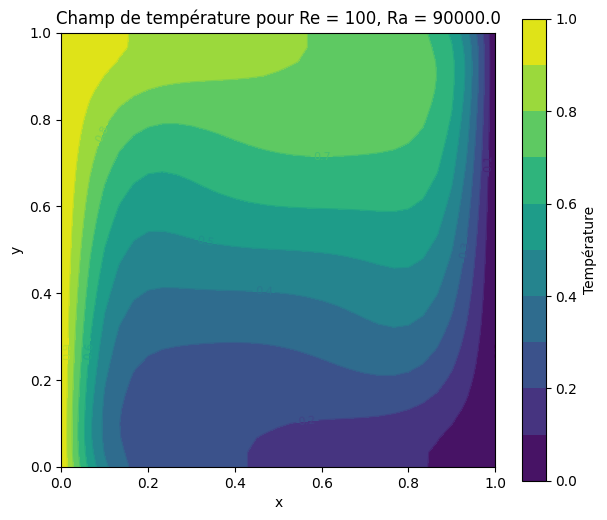

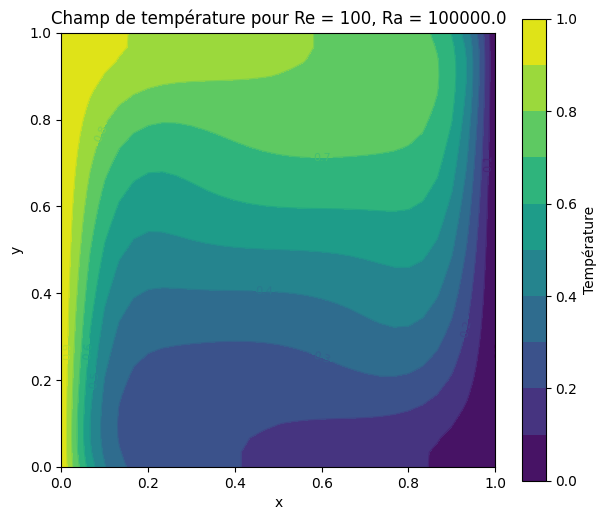

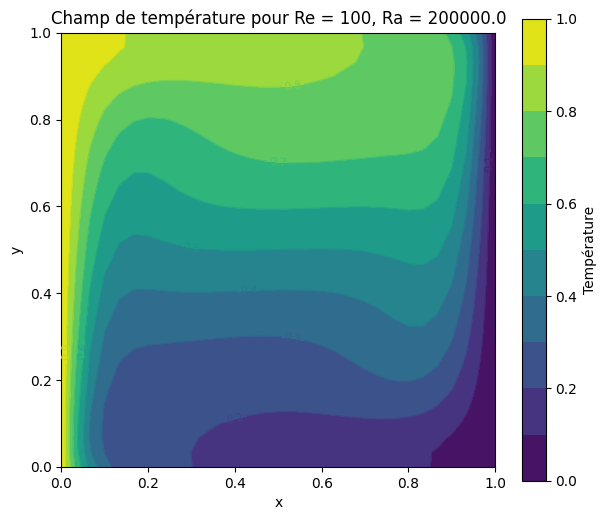

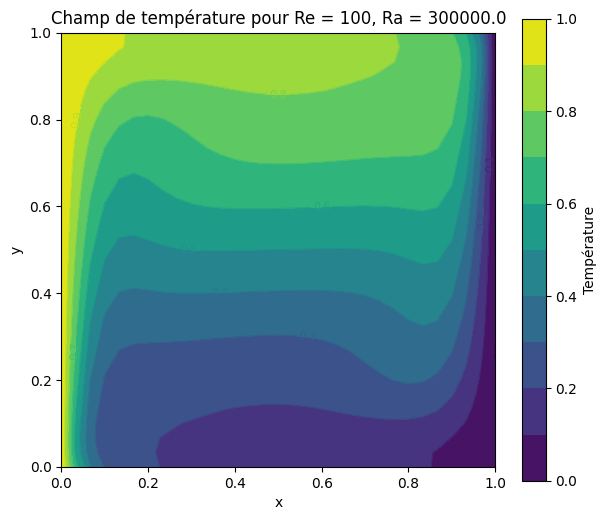

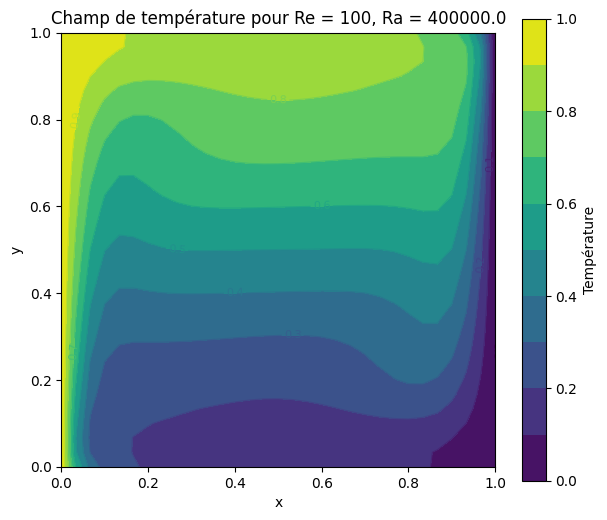

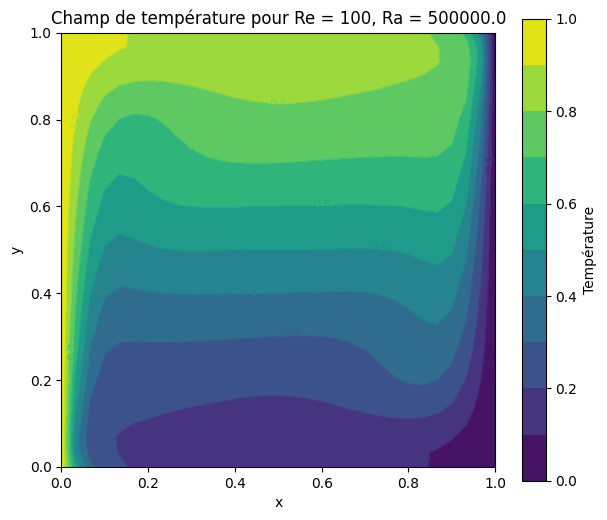

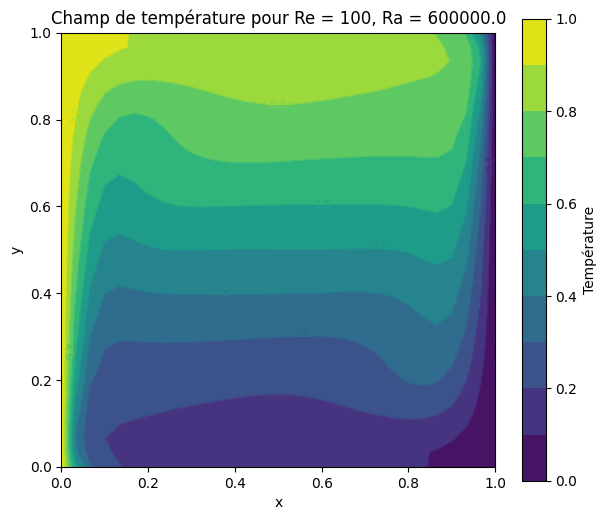

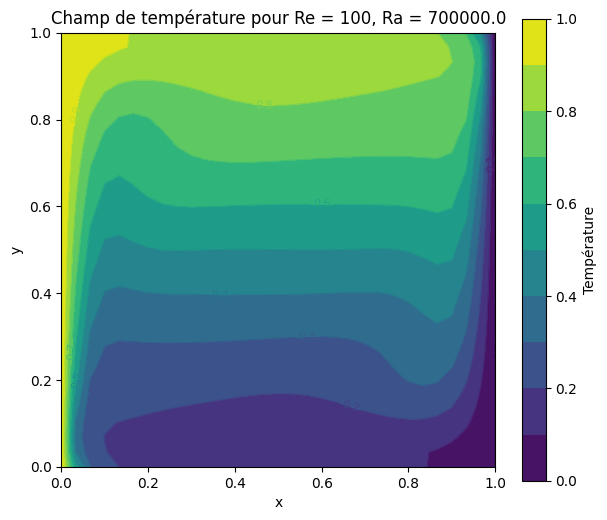

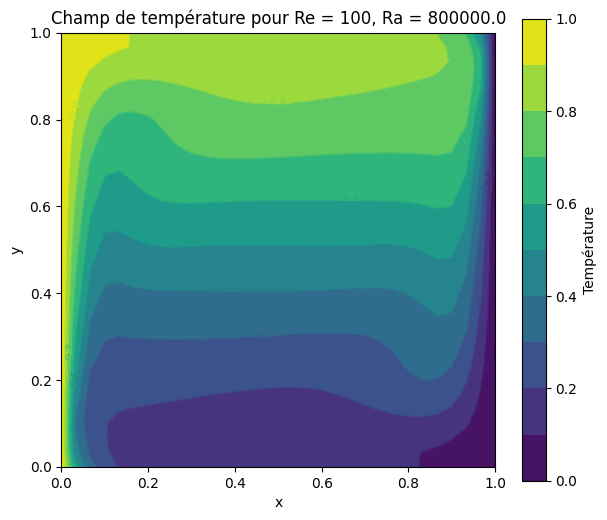

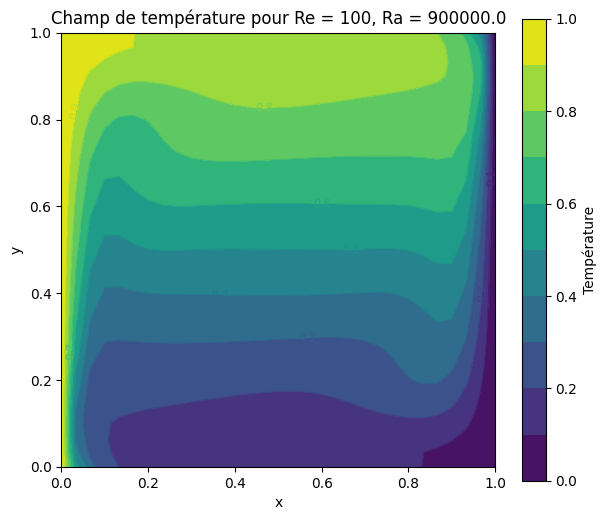

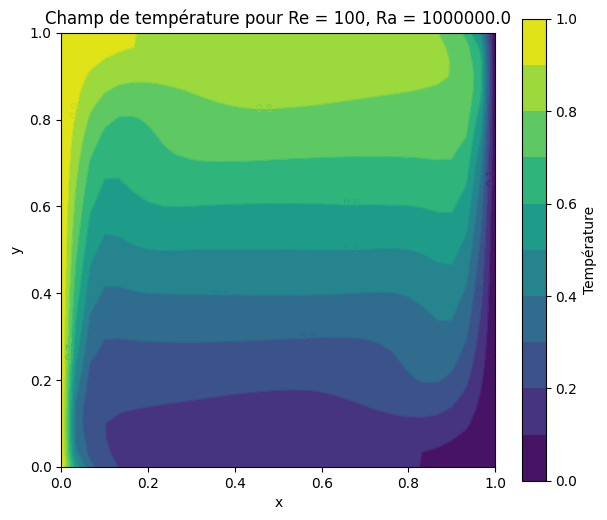

In [27]:

# Sélection d'une itération (ex: la dernière enregistrée)
for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(Ra_list):
        T_plot = res_dict[Re][Ra]['T'][-1]
        x = np.linspace(0, Lx, res_dict[Re][Ra]['T'][-1].shape[1])
        y = np.linspace(0, Ly, res_dict[Re][Ra]['T'][-1].shape[0])
        X, Y = np.meshgrid(x, y)

        Re_plot = Re_list[i]
        Ra_plot = Ra_list[j]

        plt.figure(figsize=(7, 6))
        levels = 10

        cf = plt.contourf(X, Y, T_plot, levels=levels)   # champ coloré
        cs = plt.contour(X, Y, T_plot, levels=11, linewidths=0.8)  # isothermes
        plt.clabel(cs, inline=True, fontsize=8)

        plt.colorbar(cf, label="Température")
        plt.title("Champ de température pour Re = " + str(Re_plot) + ", Ra = " + str(Ra_plot))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, Lx)
        plt.ylim(0, Ly)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()


Pe_max à Re = 100, Ra = 1.00e+04 : 0.6648550981778878


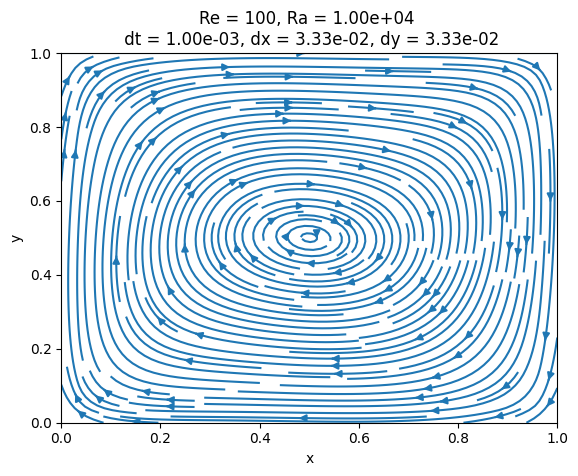

Pe_max à Re = 100, Ra = 2.00e+04 : 0.9864925709913037


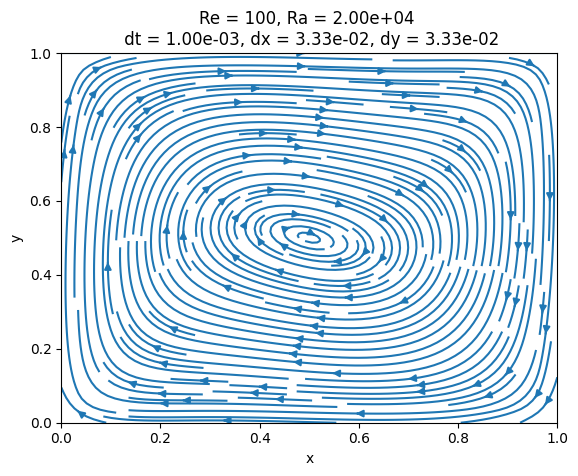

Pe_max à Re = 100, Ra = 3.00e+04 : 1.2145405798649183


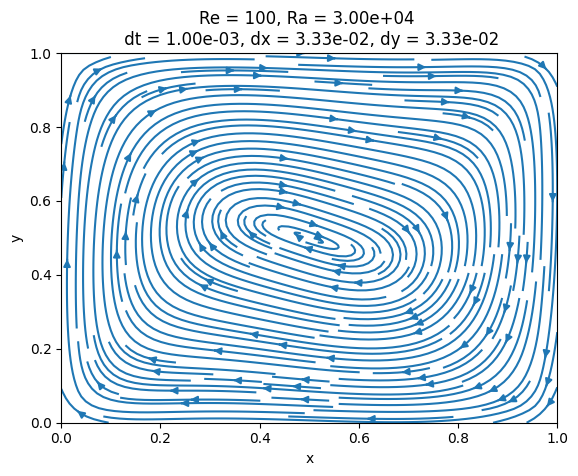

Pe_max à Re = 100, Ra = 4.00e+04 : 1.3955221784971426


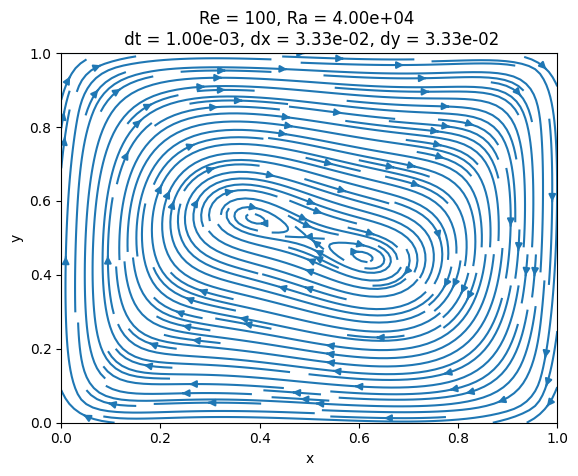

Pe_max à Re = 100, Ra = 5.00e+04 : 1.5740685612126288


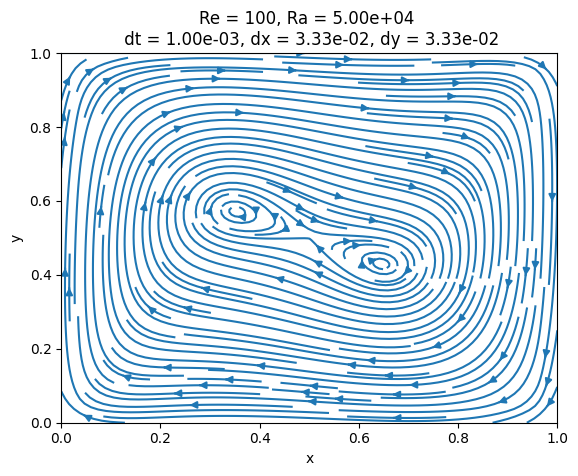

Pe_max à Re = 100, Ra = 6.00e+04 : 1.7401978172643484


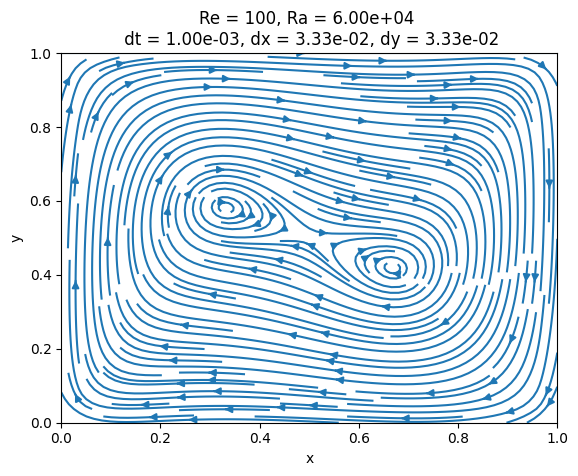

Pe_max à Re = 100, Ra = 7.00e+04 : 1.891145104025528


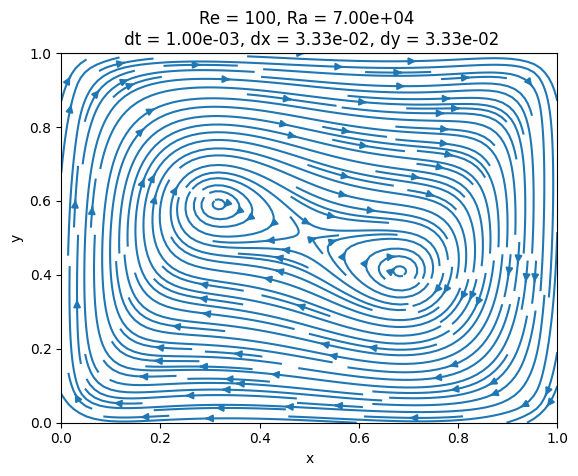

Pe_max à Re = 100, Ra = 8.00e+04 : 2.029215116296846


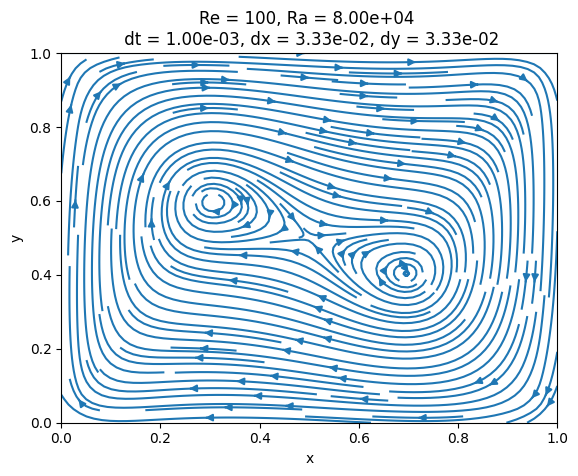

Pe_max à Re = 100, Ra = 9.00e+04 : 2.156990241563805


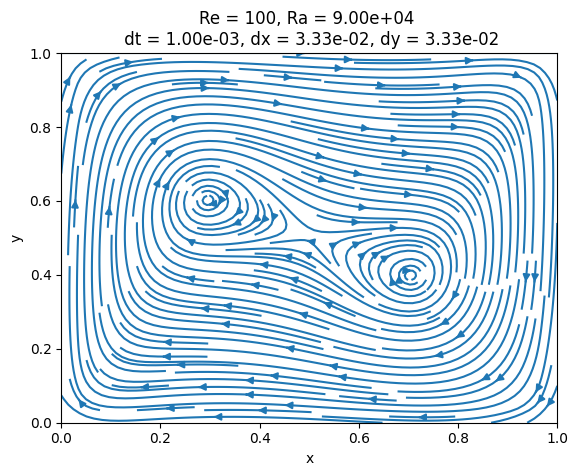

Pe_max à Re = 100, Ra = 1.00e+05 : 2.2757965212423437


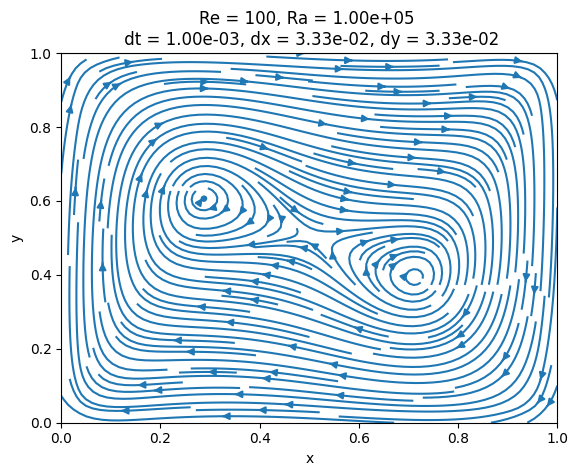

Pe_max à Re = 100, Ra = 2.00e+05 : 3.154204262390894


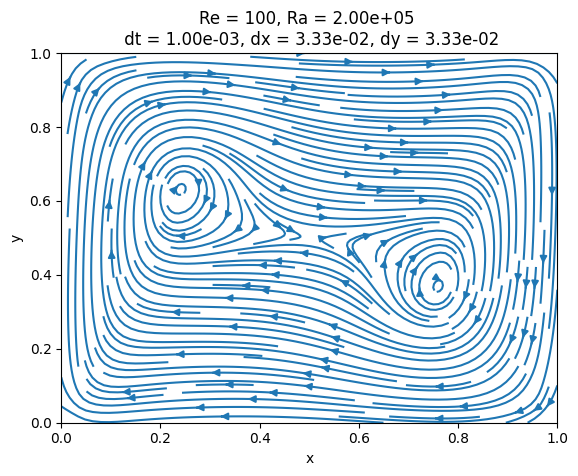

Pe_max à Re = 100, Ra = 3.00e+05 : 3.7296183021077307


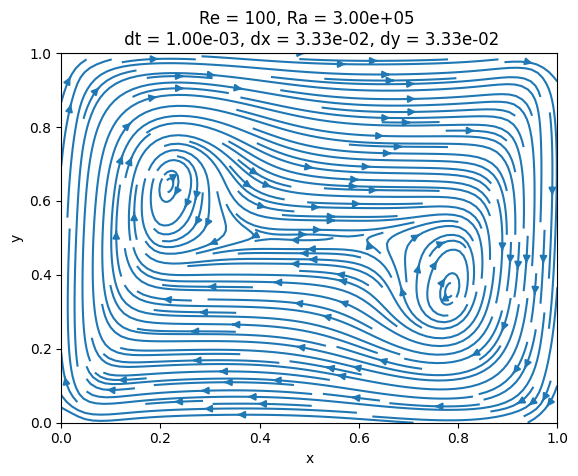

Pe_max à Re = 100, Ra = 4.00e+05 : 4.28658697130141


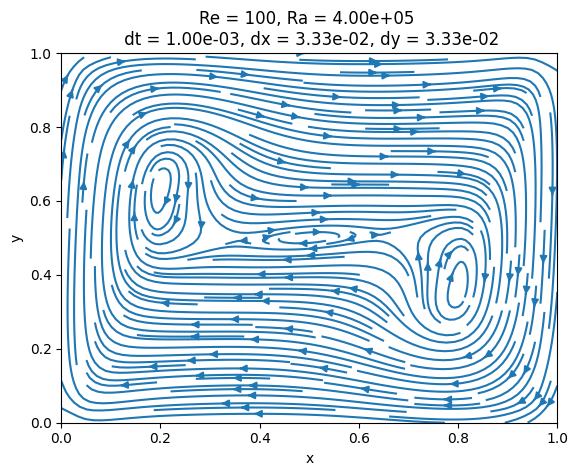

Pe_max à Re = 100, Ra = 5.00e+05 : 4.875425128047287


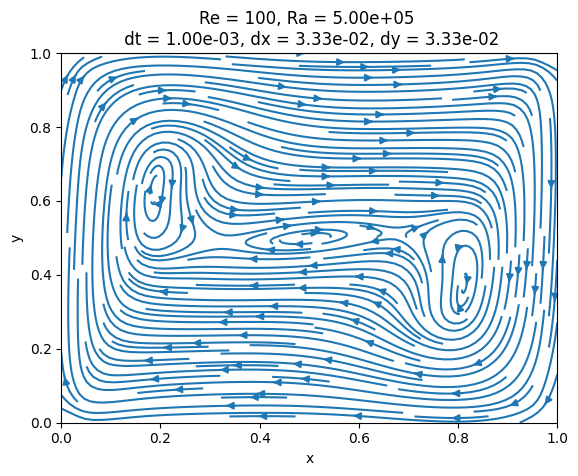

Pe_max à Re = 100, Ra = 6.00e+05 : 5.373738203558255


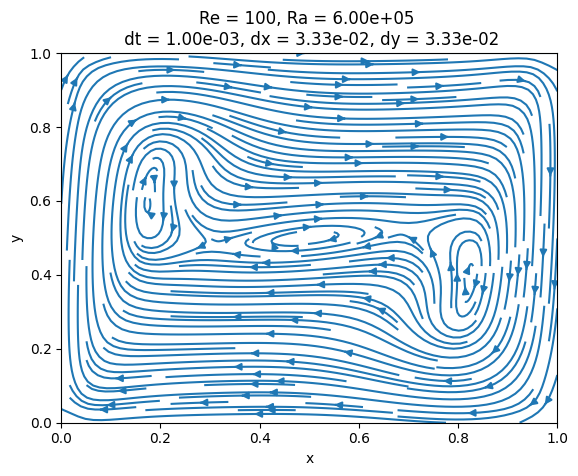

Pe_max à Re = 100, Ra = 7.00e+05 : 5.818471105907379


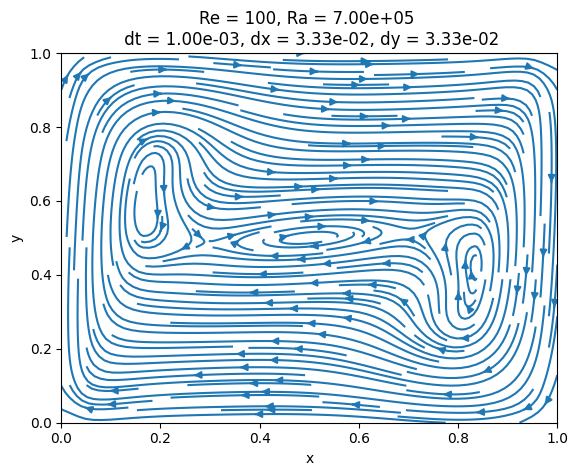

Pe_max à Re = 100, Ra = 8.00e+05 : 6.340690594466713


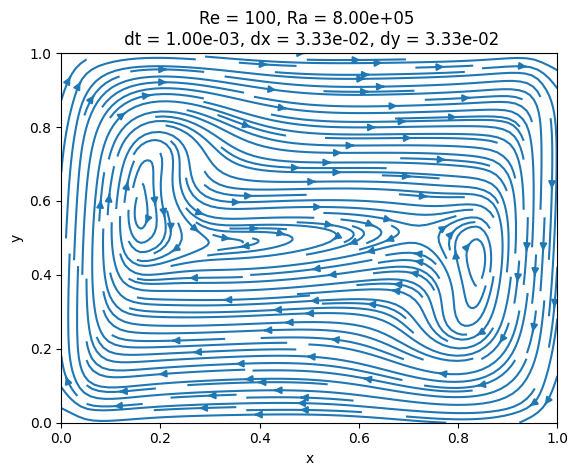

Pe_max à Re = 100, Ra = 9.00e+05 : 6.690514538498667


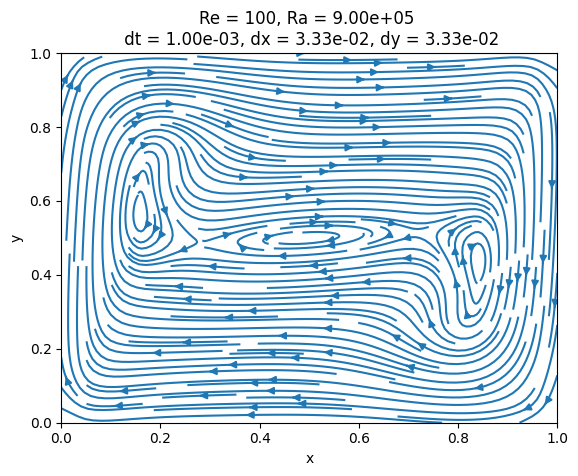

Pe_max à Re = 100, Ra = 1.00e+06 : 7.013675931562583


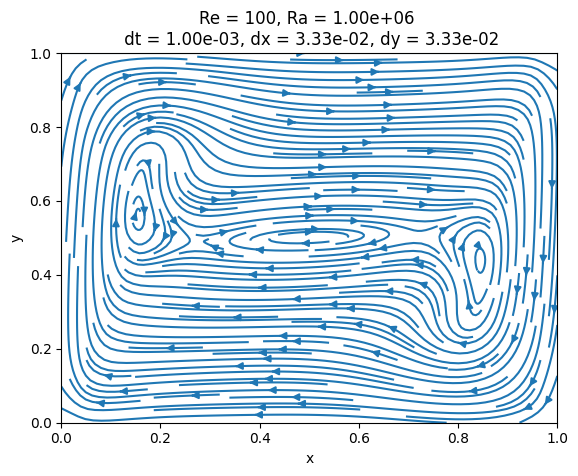

In [47]:
for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(Ra_list):
        x = np.linspace(0, Lx, res_dict[Re][Ra]['T'][-1].shape[1])
        y = np.linspace(0, Ly, res_dict[Re][Ra]['T'][-1].shape[0])
        X, Y = np.meshgrid(x, y)

        u_plot, v_plot = res_dict[Re][Ra]['u'][-1], res_dict[Re][Ra]['v'][-1]
        plt.streamplot(X,Y,u_plot,v_plot, density = 2)
        plt.title(f'Re = {Re:.0f}, Ra = {Ra:.2e} \n dt = {dt:.2e}, dx = {dx:.2e}, dy = {dy:.2e}')
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.xlabel('x')
        plt.ylabel('y')
        print(f'Pe_max à Re = {Re:.0f}, Ra = {Ra:.2e} :', max(np.max(v_plot), np.max(u_plot))*dx*Re*Pr)
        plt.show()